In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loadind the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape
test.shape

(34224, 11)

In [4]:
# columns in the train dataset
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [5]:
# columns in the test dataset
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [6]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [7]:
# Print data types for each variable
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

# UNIVARIATE ANALYSIS

In [8]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

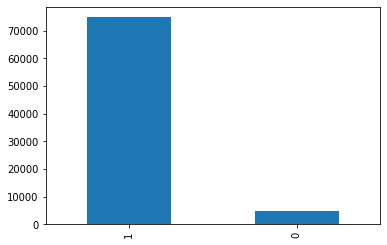

In [9]:
# plotting the bar plot
train['target'].value_counts().plot.bar()


(array([7.984e+04, 6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.4030000e+04, 9.0478870e+06, 1.8071744e+07, 2.7095601e+07,
        3.6119458e+07, 4.5143315e+07, 5.4167172e+07, 6.3191029e+07,
        7.2214886e+07, 8.1238743e+07, 9.0262600e+07]),
 <a list of 10 Patch objects>)

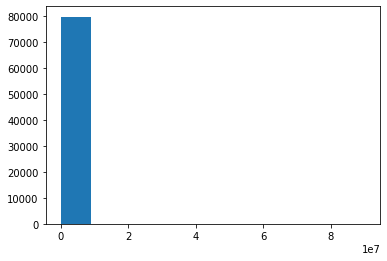

In [10]:
plt.hist(train['Income'])

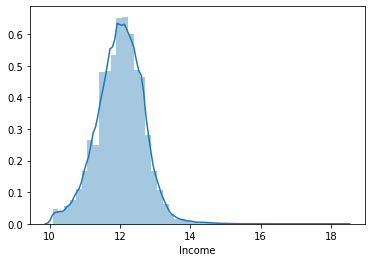

In [11]:
sn.distplot(np.log(train["Income"]))

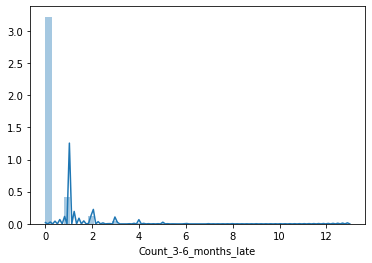

In [12]:
sn.distplot(train["Count_3-6_months_late"])

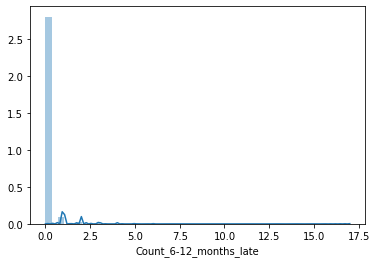

In [13]:
sn.distplot(train["Count_6-12_months_late"])

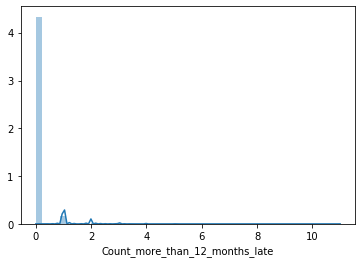

In [14]:
sn.distplot(train["Count_more_than_12_months_late"])

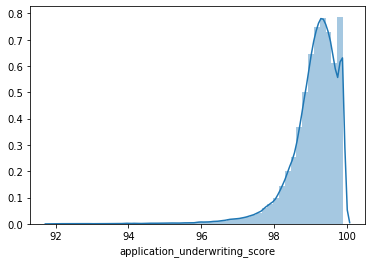

In [15]:
sn.distplot(train["application_underwriting_score"].dropna(inplace=False))

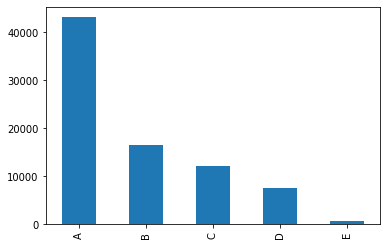

In [16]:
train['sourcing_channel'].value_counts().plot.bar()

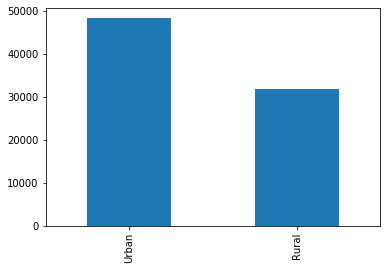

In [17]:
train['residence_area_type'].value_counts().plot.bar()

In [18]:
train['age']=train.age_in_days.apply(lambda x: int(x/365))
test['age']=test.age_in_days.apply(lambda x: int(x/365))

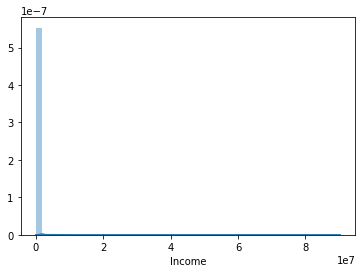

In [19]:
sn.distplot(train["Income"])


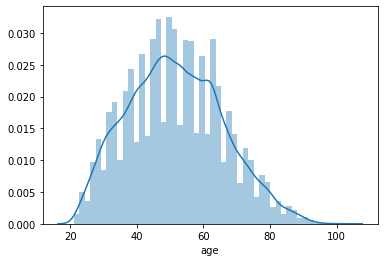

In [20]:
sn.distplot(train["age"])

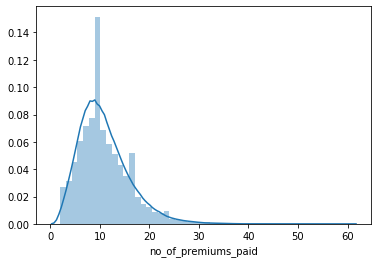

In [21]:
sn.distplot(train["no_of_premiums_paid"])

In [22]:
#train["no_of_premiums_paid"]=np.sqrt(train["no_of_premiums_paid"])

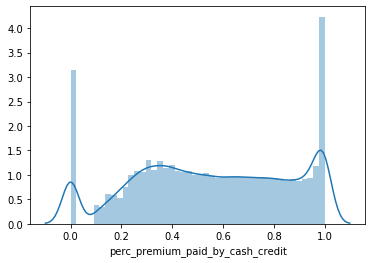

In [23]:
sn.distplot(np.cbrt(train["perc_premium_paid_by_cash_credit"]))


# BIVARIATE ANALYSIS


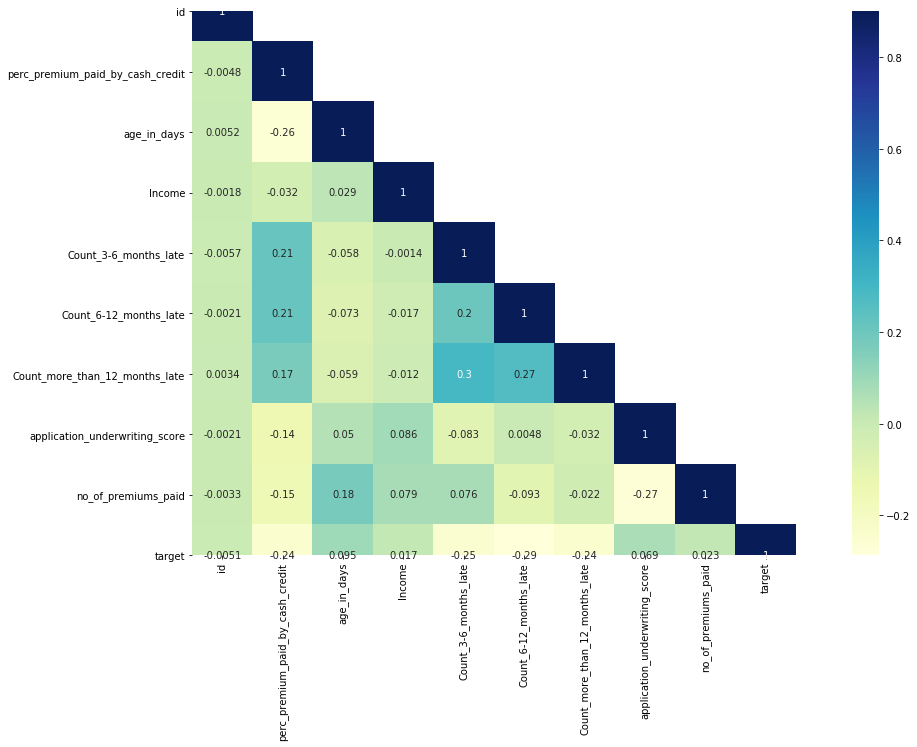

In [24]:
corr = train[['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid','target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

-0.03186755030615448

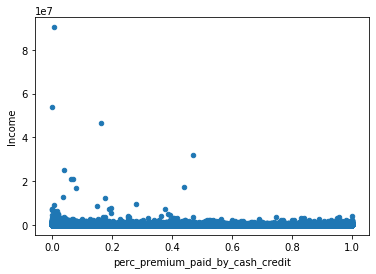

In [25]:
train.plot.scatter('perc_premium_paid_by_cash_credit','Income')
train['perc_premium_paid_by_cash_credit'].corr(train['Income'])

Text(0, 0.5, 'Percentage')

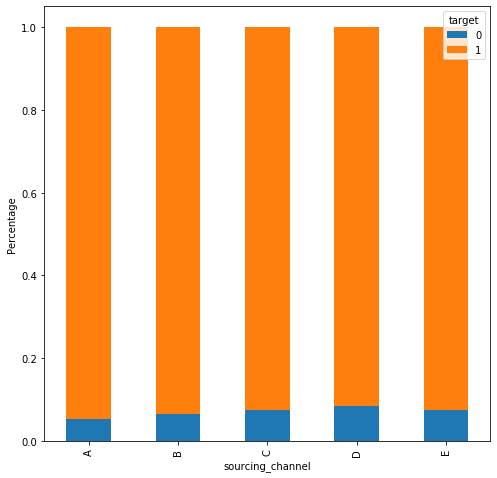

In [26]:
job=pd.crosstab(train['sourcing_channel'],train['target'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('sourcing_channel')
plt.ylabel('Percentage')

In [27]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
age                                    0
dtype: int64

In [28]:
def null_rem(df):
    df['application_underwriting_score'].fillna(df['application_underwriting_score'].mean(),inplace=True)
    df['Count_3-6_months_late'].fillna(0,inplace=True)
    df['Count_6-12_months_late'].fillna(0,inplace=True)
    df['Count_more_than_12_months_late'].fillna(0,inplace=True)
    return df

In [29]:
null_rem(train)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,1,64
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,1,53
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,1,64
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,1,62


In [30]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
age                                 0
dtype: int64

In [31]:
null_rem(test)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,649,0.001,27384,51150,0.0,0.0,0.0,99.890000,7,A,Rural,75
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.930000,19,A,Urban,65
2,70762,1.000,17170,186030,0.0,0.0,0.0,99.061898,2,B,Urban,47
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.000000,11,B,Rural,44
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.170000,14,A,Rural,29
...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,20810,110240,0.0,0.0,0.0,97.520000,9,A,Urban,57
34220,30326,0.157,19353,125090,0.0,0.0,0.0,99.620000,7,A,Rural,53
34221,65749,0.325,18264,196570,0.0,0.0,0.0,98.580000,14,B,Rural,50
34222,65686,0.983,16798,212150,1.0,0.0,1.0,98.880000,10,A,Urban,46


# OUTLIERS

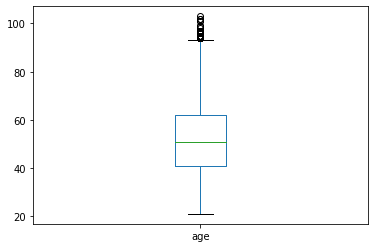

In [32]:
train['age'].plot.box()

In [33]:
mean = train.loc[train['age']<100, 'age'].mean()
train.loc[train.age > 100, 'age'] = np.nan
train.fillna(mean,inplace=True)

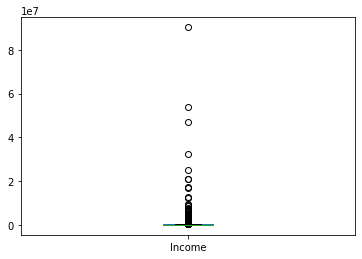

In [34]:
train['Income'].plot.box()

In [35]:
mean=train.Income.mean()

In [36]:
x=train['Income'].quantile(.999)

In [37]:
test['Income'].quantile(.999)

2400077.77

In [38]:
train["Income"] = np.where(train["Income"] >x,x,train['Income'])


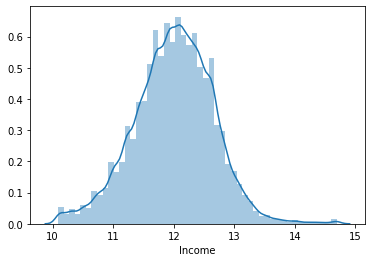

In [39]:
sn.distplot(np.log(train["Income"]))

In [40]:
train['Income']=np.log(train["Income"])

In [41]:
test['Income']=np.log(test['Income'])

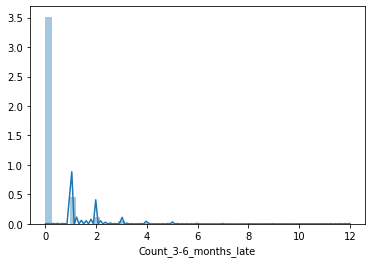

In [42]:
sn.distplot(test['Count_3-6_months_late'])

In [43]:
train["Count_3-6_months_late"] = np.where(train["Count_3-6_months_late"] >12, 0,train['Count_3-6_months_late'])


-0.11325552175937478


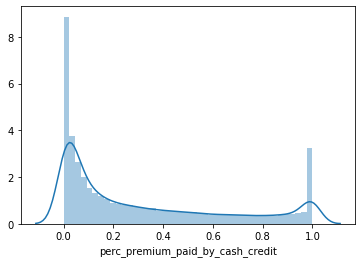

In [44]:
sn.distplot(train['perc_premium_paid_by_cash_credit'])
print(np.log(train['perc_premium_paid_by_cash_credit'].skew()))

In [45]:
Q1 = train['perc_premium_paid_by_cash_credit'].quantile(0.25)
Q3 = train['perc_premium_paid_by_cash_credit'].quantile(0.75)
IQR = Q3 - Q1
print('q1=',Q1)
print('q3=',Q3)
print('IQR=',IQR)
lowout=(Q1 - (1.5 * IQR))
upout=(Q3 +( 1.5 * IQR))
print(lowout)
print(upout)

q1= 0.034
q3= 0.5379999999999999
IQR= 0.5039999999999999
-0.7219999999999998
1.2939999999999996


In [46]:
y=train['perc_premium_paid_by_cash_credit'].quantile(0.95)

In [47]:
mean=train['perc_premium_paid_by_cash_credit'].mean()

In [48]:
train["perc_premium_paid_by_cash_credit"] = np.where(train["perc_premium_paid_by_cash_credit"] >y, mean,train['perc_premium_paid_by_cash_credit'])


In [49]:
Q1 = train['no_of_premiums_paid'].quantile(0.25)
Q3 = train['no_of_premiums_paid'].quantile(0.75)
IQR = Q3 - Q1
print('q1=',Q1)
print('q3=',Q3)
print('IQR=',IQR)
lowout=(Q1 - (1.5 * IQR))
upout=(Q3 +( 1.5 * IQR))
print(lowout)
print(upout)

q1= 7.0
q3= 14.0
IQR= 7.0
-3.5
24.5


In [50]:
mean=train['no_of_premiums_paid'].mean()


In [51]:
train["no_of_premiums_paid"] = np.where(train["no_of_premiums_paid"] <lowout, lowout,train['no_of_premiums_paid'])
train["no_of_premiums_paid"] = np.where(train["no_of_premiums_paid"] >upout, mean,train['no_of_premiums_paid'])
print(train['no_of_premiums_paid'].skew())

0.5897801309695724


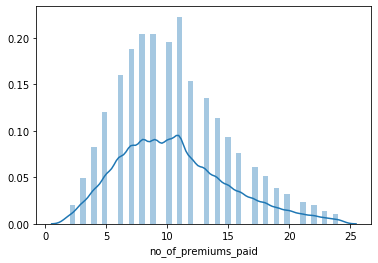

In [52]:
sn.distplot(train['no_of_premiums_paid'])

In [53]:
train['Count_more_than_12_months_late']=np.sqrt(train['Count_more_than_12_months_late'])
test['Count_more_than_12_months_late']=np.sqrt(test['Count_more_than_12_months_late'])

In [54]:
train['Count_6-12_months_late']=np.sqrt(train['Count_6-12_months_late'])
test['Count_6-12_months_late']=np.sqrt(test['Count_6-12_months_late'])

In [55]:
train['Count_3-6_months_late']=np.sqrt(train['Count_3-6_months_late'])
test['Count_3-6_months_late']=np.sqrt(test['Count_3-6_months_late'])

In [56]:
train['application_underwriting_score']=np.log(train['application_underwriting_score'])
test['application_underwriting_score']=np.log(test['application_underwriting_score'])

In [57]:
def transform(df):
    df["sourcing_channel"]=label.fit_transform(df['sourcing_channel'])
    df["residence_area_type"]=label.fit_transform(df['residence_area_type'])
    return df

In [58]:
transform(train)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,12058,12.780042,0.000000,0.000000,0.0,4.595322,13.0,2,1,1,33.0
1,41492,0.010,21546,12.660804,0.000000,0.000000,0.0,4.604070,21.0,0,1,1,59.0
2,31300,0.917,17531,11.340237,1.414214,1.732051,1.0,4.591984,7.0,2,0,0,48.0
3,19415,0.049,15341,12.431254,0.000000,0.000000,0.0,4.600861,9.0,0,1,1,42.0
4,99379,0.052,31400,12.199451,0.000000,0.000000,0.0,4.603869,12.0,1,1,1,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,12.321854,1.000000,0.000000,0.0,4.592085,19.0,1,1,1,64.0
79849,59012,0.704,19356,12.539505,1.000000,0.000000,1.0,4.599353,12.0,0,0,1,53.0
79850,77050,0.000,23372,12.628133,0.000000,0.000000,0.0,4.594008,12.0,0,0,1,64.0
79851,67225,0.398,22641,10.579743,0.000000,0.000000,0.0,4.591882,8.0,0,0,1,62.0


In [59]:
train.drop(['id','age_in_days'],axis=1,inplace=True)

In [60]:
test.drop(['id','age_in_days'],axis=1,inplace=True)

In [61]:
train

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.429,12.780042,0.000000,0.000000,0.0,4.595322,13.0,2,1,1,33.0
1,0.010,12.660804,0.000000,0.000000,0.0,4.604070,21.0,0,1,1,59.0
2,0.917,11.340237,1.414214,1.732051,1.0,4.591984,7.0,2,0,0,48.0
3,0.049,12.431254,0.000000,0.000000,0.0,4.600861,9.0,0,1,1,42.0
4,0.052,12.199451,0.000000,0.000000,0.0,4.603869,12.0,1,1,1,86.0
...,...,...,...,...,...,...,...,...,...,...,...
79848,0.425,12.321854,1.000000,0.000000,0.0,4.592085,19.0,1,1,1,64.0
79849,0.704,12.539505,1.000000,0.000000,1.0,4.599353,12.0,0,0,1,53.0
79850,0.000,12.628133,0.000000,0.000000,0.0,4.594008,12.0,0,0,1,64.0
79851,0.398,10.579743,0.000000,0.000000,0.0,4.591882,8.0,0,0,1,62.0


# PREDICTIVEMODEL


In [62]:
train = pd.get_dummies(train)


In [63]:
train

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,0.429,12.780042,0.000000,0.000000,0.0,4.595322,13.0,2,1,1,33.0
1,0.010,12.660804,0.000000,0.000000,0.0,4.604070,21.0,0,1,1,59.0
2,0.917,11.340237,1.414214,1.732051,1.0,4.591984,7.0,2,0,0,48.0
3,0.049,12.431254,0.000000,0.000000,0.0,4.600861,9.0,0,1,1,42.0
4,0.052,12.199451,0.000000,0.000000,0.0,4.603869,12.0,1,1,1,86.0
...,...,...,...,...,...,...,...,...,...,...,...
79848,0.425,12.321854,1.000000,0.000000,0.0,4.592085,19.0,1,1,1,64.0
79849,0.704,12.539505,1.000000,0.000000,1.0,4.599353,12.0,0,0,1,53.0
79850,0.000,12.628133,0.000000,0.000000,0.0,4.594008,12.0,0,0,1,64.0
79851,0.398,10.579743,0.000000,0.000000,0.0,4.591882,8.0,0,0,1,62.0


In [64]:
from sklearn.model_selection import train_test_split

In [289]:
train,val=train_test_split(train,test_size=0.3,random_state=113)

In [290]:
x_train=train.drop('target',axis=1)
y_train=train['target']
x_val=val.drop('target',axis=1)
y_val=val['target']
x_train1=scaler.fit_transform(x_train)
x_val1=scaler.fit_transform(x_val)

In [291]:
lreg=LogisticRegression()

In [292]:
lreg.fit(x_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [293]:
lreg.fit(x_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
lreg.score(x_train1,y_train)

0.9396244354647016

In [295]:
lreg.score(x_val1,y_val)

0.9451219512195121

In [296]:
x=train.drop('target',axis=1)
y=train['target']

In [297]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=101,stratify=y)

In [298]:
train_x1=scaler.fit_transform(train_x)
test_x1=scaler.fit_transform(test_x)

In [299]:
clf.fit(train_x1,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
clf.score(train_x1,train_y)

1.0

In [302]:
clf.score(test_x1,test_y)

0.8916349809885932

In [303]:
predict = clf.predict(test_x1)

In [304]:
from sklearn.metrics import accuracy_score

In [305]:
accuracy_score(test_y, predict)

0.8916349809885932

In [306]:
test

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,0.001,10.842518,0.0,0.0,0.0,4.604070,7,0,0,75
1,0.124,12.560736,0.0,0.0,0.0,4.594413,19,0,1,65
2,1.000,12.133663,0.0,0.0,0.0,4.595745,2,1,1,47
3,0.198,11.724320,0.0,0.0,0.0,4.595120,11,1,0,44
4,0.041,12.206173,1.0,0.0,0.0,4.596836,14,0,0,29
...,...,...,...,...,...,...,...,...,...,...
34219,0.227,11.610415,0.0,0.0,0.0,4.580057,9,0,1,57
34220,0.157,11.736789,0.0,0.0,0.0,4.601363,7,0,0,53
34221,0.325,12.188774,0.0,0.0,0.0,4.590868,14,1,0,50
34222,0.983,12.265049,1.0,0.0,1.0,4.593907,10,0,1,46


In [307]:
transform(test)


,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
0,0.001,10.842518,0.0,0.0,0.0,4.604070,7,0,0,75
1,0.124,12.560736,0.0,0.0,0.0,4.594413,19,0,1,65
2,1.000,12.133663,0.0,0.0,0.0,4.595745,2,1,1,47
3,0.198,11.724320,0.0,0.0,0.0,4.595120,11,1,0,44
4,0.041,12.206173,1.0,0.0,0.0,4.596836,14,0,0,29
...,...,...,...,...,...,...,...,...,...,...
34219,0.227,11.610415,0.0,0.0,0.0,4.580057,9,0,1,57
34220,0.157,11.736789,0.0,0.0,0.0,4.601363,7,0,0,53
34221,0.325,12.188774,0.0,0.0,0.0,4.590868,14,1,0,50
34222,0.983,12.265049,1.0,0.0,1.0,4.593907,10,0,1,46


In [308]:
train


,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
12195,0.210,11.696413,0.0,0.0,0.0,4.592288,16.0,0,0,1,68.0
55295,0.295,11.919257,1.0,0.0,0.0,4.600057,9.0,1,0,1,75.0
44806,0.157,12.008780,0.0,0.0,0.0,4.598850,10.0,0,1,1,29.0
15578,0.279,11.513525,0.0,0.0,0.0,4.591680,20.0,0,1,1,31.0
1560,0.874,11.720509,0.0,0.0,0.0,4.594716,6.0,0,1,1,62.0
...,...,...,...,...,...,...,...,...,...,...,...
522,0.170,12.899520,0.0,0.0,0.0,4.598146,15.0,2,0,1,36.0
52261,0.513,12.128435,0.0,0.0,0.0,4.602968,7.0,1,0,1,46.0
76339,0.617,12.449450,1.0,0.0,0.0,4.602266,11.0,0,1,1,29.0
55092,0.803,11.496389,0.0,0.0,0.0,4.590361,10.0,3,1,1,43.0


In [309]:
test = pd.get_dummies(test)

In [310]:
test1=scaler.fit_transform(test)

In [311]:
pred_dtc=clf.predict_proba(test1)

In [312]:
lg_predict = lreg.predict_proba(test1)

In [313]:
print(lg_predict)

[[0.01357466 0.98642534]
 [0.0259226  0.9740774 ]
 [0.06038655 0.93961345]
 ...
 [0.03856931 0.96143069]
 [0.34973333 0.65026667]
 [0.04786611 0.95213389]]


In [314]:
finaltest=pd.read_csv('test.csv')
submission=pd.DataFrame()

In [315]:
submission['id']=finaltest['id']
submission['target']=lg_predict[:,-1]

In [316]:

submission.to_csv('submission_logreg.csv',index=False)
